# Set-Up

In [1]:
import matplotlib.pyplot as plt #plots
import numpy as np # mathsy stuff
import random # random numbers
import time # execution time counter
from matplotlib import cm # for contour map
from sklearn.cluster import KMeans # for clustering

from matplotlib.patches import Rectangle # This and other for making a square on a plot
from matplotlib.collections import PatchCollection # This and other for making a square on a plot

# The Problem Function

In [3]:
def Q1function(x,y,z):
    
    '''The function Q1fucntion is the function we are trying to maximise for question one'''
    
    f = (np.exp(np.sin(40*z)) + np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x))
         + np.sin(70*np.cos(z)) + np.sin(np.sin(80*y)) - np.sin(10*(x+y)) + ((x**2 + y**2 + z**2)/4))       
    return f

In [4]:
# Consider the function in it parts

# x alone
def Q1function_x(x):
    f = (np.exp(np.sin(50*x)) + np.sin(70*np.sin(x)) + ((x**2) /4))
    return f

# y alone
def Q1function_y(y):
    f = (np.sin(60*np.exp(y)) + np.sin(np.sin(80*y)) + ((y**2)/4))
    return f

# z alone
def Q1function_z(z):
    f = (np.exp(np.sin(40*z)) + np.sin(70*np.cos(z)) + ((z**2)/4))
    return f

# The functions above of the parts of the overall function which relate to only one variable
# One piece of the overall function is missing from the above part functions: the term which includes x and y

# x and y
def Q1function_xy(x,y):
    f = - np.sin(10*(x+y))
    return f

# for the sake of ease for the next bit this term is going to treated sin(20*2x) for a moment
def Q1function_2x(x):
    f = - np.sin(10*(2*x))
    return f

# Looking at Z

In [2]:
def steps(mn, mx, steps):
    
    '''I use this to generate a list with a defined start and end point and set step size'''
    
    h = [(mn+a*(mx-mn)/steps) for a in range(steps+1)]
    return(h)
    

In [5]:
h = steps(-1,1,2000)

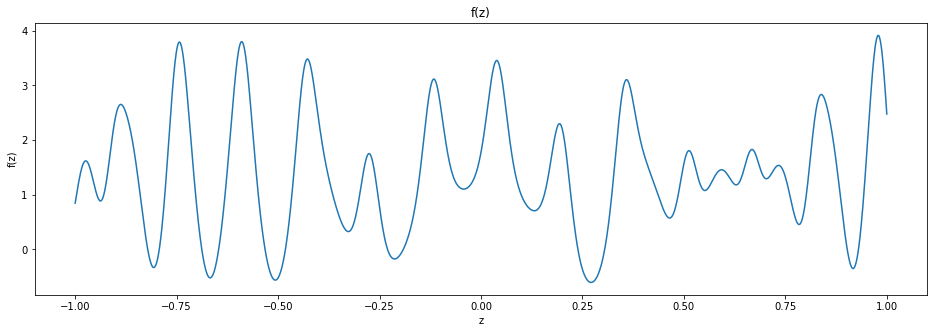

In [6]:
# Plotting f(z)

fig, ax3 = plt.subplots(figsize=(16,5))

ax3.plot(h, [Q1function_z(i) for i in h])
ax3.set_title("f(z)")
ax3.set_ylabel('f(z)')
ax3.set_xlabel('z')

plt.show()

In [8]:
a = steps(0.97, 0.986, 1000)
b = steps(-0.75, -0.55, 1000)

In [13]:
# apparent global maximum

fz_best, z_best = max([(Q1function_z(i),i) for i in a])
print(fz_best, z_best)

3.9173982337677034 0.9789599999999999


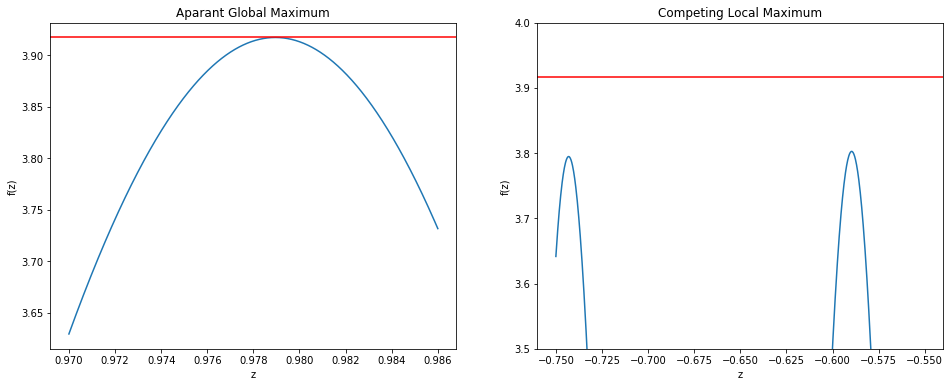

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

ax1.plot(a, [Q1function_z(i) for i in a])
ax1.set_title("Aparant Global Maximum")
ax1.set_ylabel('f(z)')
ax1.set_xlabel('z')
ax1.axhline(y=zmaxmax, c='r')

ax2.plot(b, [Q1function_z(i) for i in b])
ax2.set_title("Competing Local Maximum")
ax2.set_ylabel('f(z)')
ax2.set_xlabel('z')
ax2.axhline(y=zmaxmax, c='r')

plt.ylim(3.5, 4)
plt.show()

In [14]:
# Let's get real precise for the z maximum

start = time.time()
n_steps = 10**5

for n in range(n_steps):
    z_new = z_best + random.gauss(0,0.01)*(1-n/n_steps)
    fz_new = Q1function_z(z_new)
    if fz_new > fz_best:
        fz_best = fz_new
        z_best = z_new

        
print ('zbest' , z_best, 'fz_best', fz_best,)
end = time.time()
print('Execution time (s): ', end - start)

zbest 0.9789541124691598 fz_best 3.9173983643547565
Execution time (s):  10.954702377319336


# Considering x and y

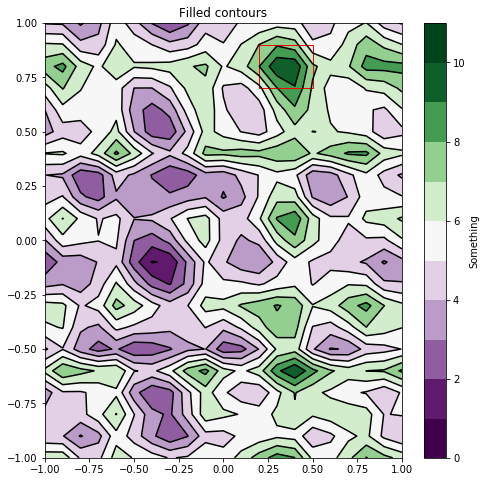

In [15]:
# Can now consider x and y together
xmin = -1
xmax = 1
ymin = -1
ymax = 1

g = steps(xmin,xmax,20)
h = steps(ymin,ymax,20)

extent = (-1, 1, -1, 1)

x, y = np.meshgrid(g, g)
z = z_best

Z = Q1function(x,y,z)


levels = np.arange(0, 12, 1)
# print(levels)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=abs(Z).min())
cmap = cm.PRGn

fig, ax = plt.subplots(figsize=(8,8))

cset1 = ax.contourf(x, y, Z, levels, norm=norm, cmap=cm.get_cmap(cmap, len(levels) - 1))
cset2 = ax.contour(x, y, Z, cset1.levels, colors='k')
# ax.clabel(cset2, inline=1, fontsize=10)

ax.set_title('Filled contours')


cbar = fig.colorbar(cset1)
cbar.ax.set_ylabel('Something')

errorboxes = []
rect = Rectangle((0.2, 0.7), 0.3, 0.2)
errorboxes.append(rect)
pc = PatchCollection(errorboxes, facecolor='None', edgecolor='red')
ax.add_collection(pc)




plt.show()

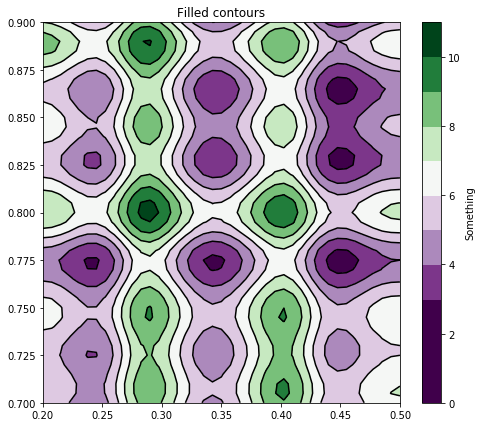

In [37]:
xmin = 0.2
xmax = xmin + 0.3
ymin = 0.7
ymax = ymin + 0.2

g = steps(xmin,xmax,40)
h = steps(ymin,ymax,40)

extent = (ymin, ymax, xmin, xmax)

x, y = np.meshgrid(g, h)
z = z_best

Z = Q1function(x,y,z)


levels = np.arange(0, 12, 1)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=abs(Z).min())
cmap = cm.PRGn

fig, ax = plt.subplots(figsize=(8,7))

cset1 = ax.contourf(x, y, Z, levels, norm=norm, cmap=cm.get_cmap(cmap, len(levels) - 1))
cset2 = ax.contour(x, y, Z, cset1.levels, colors='k')
# ax.clabel(cset2, inline=1, fontsize=10)

ax.set_title('Filled contours')


cbar = fig.colorbar(cset1)
cbar.ax.set_ylabel('Something')


plt.show()

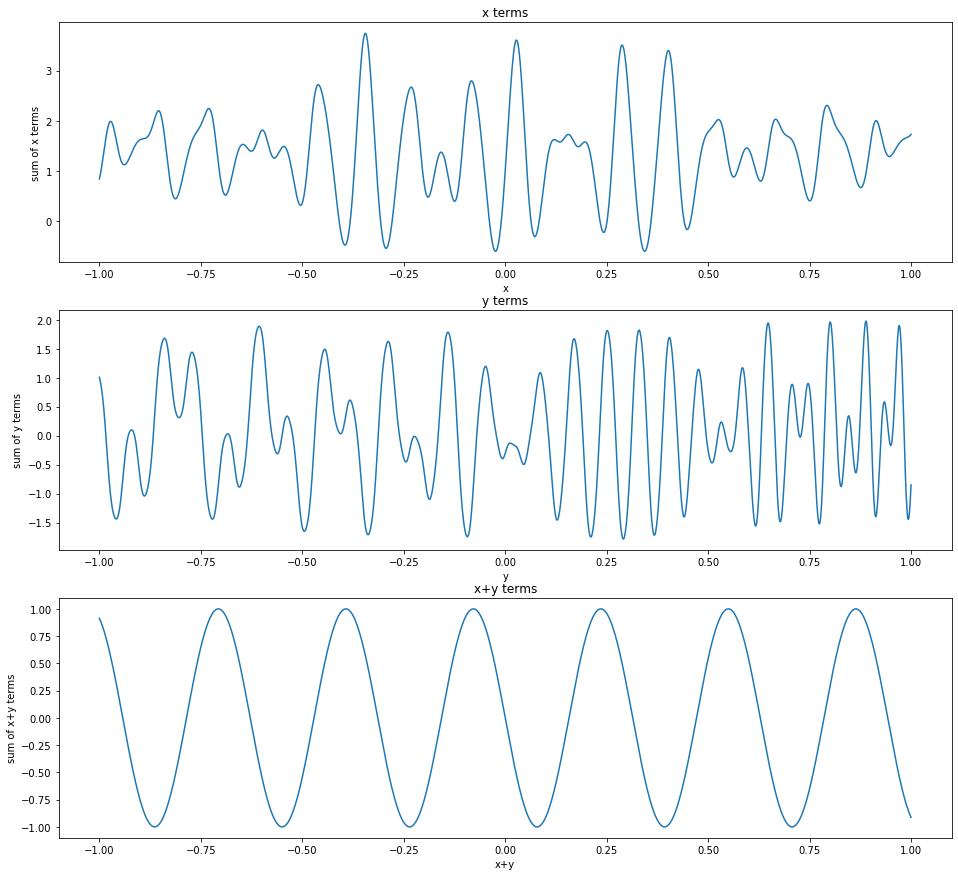

In [17]:
h = steps(-1,1,2000)

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(16,15))

ax1.plot(h, [Q1function_x(i) for i in h])
ax1.set_title("x terms")
ax1.set_ylabel('sum of x terms')
ax1.set_xlabel('x')

ax2.plot(h, [Q1function_y(i) for i in h])
ax2.set_title("y terms")
ax2.set_ylabel('sum of y terms')
ax2.set_xlabel('y')

ax3.plot(h, [Q1function_2x(i) for i in h])
ax3.set_title("x+y terms")
ax3.set_ylabel('sum of x+y terms')
ax3.set_xlabel('x+y')


plt.show()

In [20]:
# Grid Search for x y space.
# Specifically I'm looking for a range of high value points

z = z_best
hvp = []

for x in h:
    for y in h:
        f = Q1function(x,y,z)
        if f > 10:
            hvp.append((f,(x,y)))

In [47]:
# local_maximums = np.array(list(zip(wha, ono)))

f_values, coordinates = zip(*hvp)
x_coordinate, y_coordinate = zip(*coordinates)

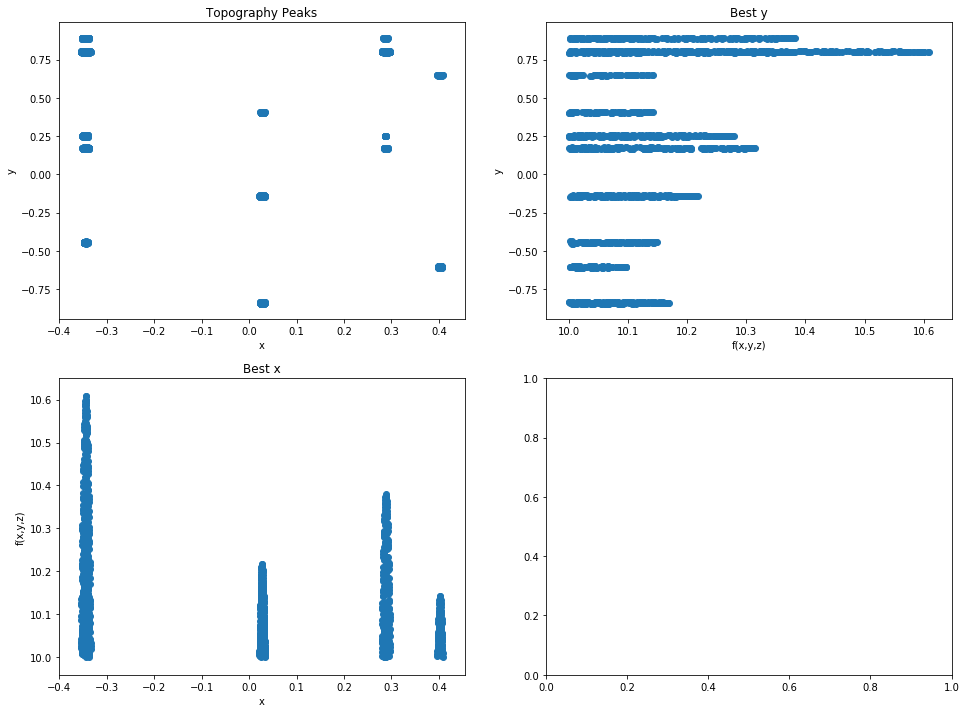

In [52]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(16,12))

ax1.scatter(x_coordinate, y_coordinate)
ax1.set_title("Topography Peaks")
ax1.set_ylabel('y')
ax1.set_xlabel('x')


ax2.scatter(f_values, y_coordinate)
ax2.set_title("Best y")
ax2.set_ylabel('y')
ax2.set_xlabel('f(x,y,z)')

ax3.scatter(x_coordinate, f_values)
ax3.set_title("Best x")
ax3.set_ylabel('f(x,y,z)')
ax3.set_xlabel('x')

# ax4.scatter(h, wha)
# ax4.set_title("Best x")
# ax4.set_ylabel('f(x,y)')
# ax4.set_xlabel('y')


plt.show()

In [58]:
# Clustering coordinates generated to get approximations of peaks identified

kmeans = KMeans(n_clusters=14,).fit(coordinates)

kmeans.cluster_centers_

array([[ 0.28828743,  0.80085629],
       [-0.34460684, -0.44489744],
       [-0.34451751,  0.80102724],
       [-0.34535928,  0.25097006],
       [ 0.02790476, -0.83940816],
       [ 0.02716875, -0.14155   ],
       [ 0.4025    , -0.6055    ],
       [ 0.028     ,  0.40479221],
       [ 0.28831034,  0.16996552],
       [ 0.40242857,  0.64811688],
       [-0.34451269,  0.17020305],
       [-0.34518792,  0.88846309],
       [ 0.28740816,  0.88853061],
       [ 0.28733333,  0.25075   ]])

# Simulated Anneal about probably global maximum

In [25]:
def step_generator(old_x, old_y, limits):
    
    '''This generates steps for a search of the x y space within defined limits'''
    
    new_x = -2
    new_y = -2
    
    xsigma = 0.5*(limits[1]-limits[0])
    ysigma = 0.5*(limits[3]-limits[2])
    
    while not(new_x >= limits[0] and new_x <= limits[1]):
        new_x = old_x + random.gauss(0,xsigma)        
    while not(new_y >= limits[2] and new_y <= limits[3]):
        new_y = old_y + random.gauss(0,ysigma)
    return(new_x, new_y)
            
    

In [26]:
# Trying a search function: Simulated Anneal
start = time.time()

search_focus = (-0.34, 0.8)

limits = (search_focus[0]-0.1, search_focus[0]+0.1, search_focus[1]-0.1, search_focus[1]+0.1)

# best_fs = []
# best_xs = []
# best_ys = []
x_best = search_focus[0]
y_best = search_focus[1]
f_best = 10

n_steps = 10**6
k=5
for n in range(n_steps):
    T=k*(1-n/n_steps)
    x_new, y_new = step_generator(x_best, y_best, limits)
    f_newxy = Q1function(x_new, y_new, z_best)
    f_newx = Q1function(x_new, y_best, z_best)
    f_newy = Q1function(x_best, y_new, z_best)
    rn = random.random()
    if rn < np.exp((f_newxy-f_best)/T): 
# If f_new > f_best then e() will be greater than 1 and so larger than random number
        f_best = f_newxy
        x_best = x_new
        y_best = y_new
    elif f_newx > f_best:
        f_best = f_newx
        x_best = x_new
    elif f_newy > f_best:
        f_best = f_newy
        y_best = y_new

#     best_fs.append(f_best)
#     best_xs.append(x_best)
#     best_ys.append(y_best)

        
print(f_best, x_best, y_best)

end = time.time()
print('Execution time (s): ', end - start)

10.609612066313725 -0.34453573993962106 0.800853629367744
Execution time (s):  541.7417585849762


# Hill Climb from result of SimAn

In [27]:
start = time.time()
n_steps = 10**5
for n in range(n_steps):
    x_new = x_best + random.gauss(0,0.001)*(1-n/n_steps)
    f_newx = Q1function(x_new, y_best, z_best)
    if f_newx > f_best:
        f_best = f_newx
        x_best = x_new
    
    y_new = y_best + random.gauss(0,0.001)*(1-n/n_steps)
    f_newy = Q1function(x_best, y_new, z_best)
    if f_newy > f_best:
        f_best = f_newy
        y_best = y_new
        
print ('xbest' , x_best, 'ybest' , y_best, 'fbest', f_best,)
end = time.time()
print('Execution time (s): ', end - start)

xbest -0.34457068137872937 ybest 0.8008586208889551 fbest 10.609619150733648
Execution time (s):  28.336214065551758


In [55]:
a = 10.609612066313725
b = 10.609619150733648
c = (b-a)/a
print(c)

6.677360000824137e-07


# Repeated Random Start Hill Climb about probable global maximum

In [45]:
start = time.time()

##### ILS from cluster start
xopt, yopt = kmeans.cluster_centers_[3]+random.random()*0.2-0.1
fopt = Q1function(xopt, yopt, z_best)

big_steps = 10**2  
##### Standard Hill Climb Parameters

small_steps = 10**3
##### Outer loop for ILS
for i in range(big_steps):
    xbest, ybest = kmeans.cluster_centers_[3]+random.random()*0.2-0.1   
############## Standard Hill Climb   
    for i in range(small_steps):
        x_new = x_best + random.gauss(0,0.05)*(1-n/n_steps)
        f_newx = Q1function(x_new, y_best, z_best)
        if f_newx > f_best:
            f_best = f_newx
            x_best = x_new

        y_new = y_best + random.gauss(0,0.001)*(1-n/n_steps)
        f_newy = Q1function(x_best, y_new, z_best)
        if f_newy > f_best:
            f_best = f_newy
            y_best = y_new
##### Continue ILS Loop (CHECK AGAINST CURRENT OPTIMAL)
    if f_best > fopt:
        fopt = f_best 
        xopt, yopt = x_best, y_best
        

  ### Evaluate and print best solution

print ('fopt', fopt, 'xopt' , xopt, 'yopt' , yopt,)

end = time.time()
print('Execution time (s): ', end - start)

fopt 10.609619150733756 xopt -0.34457068566477433 yopt 0.8008586213579677
Execution time (s):  33.25057673454285


In [31]:
# Trying a search function: Simulated Anneal
# Looking over whole search space
start = time.time()

search_focus = (2*random.random()-1, 2*random.random()-1)

limits = (-1,1,-1,1)

best_fs = []
best_xs = []
best_ys = []
x_best = search_focus[0]
y_best = search_focus[1]
f_best = 0

n_steps = 10**6
k=5
for n in range(n_steps):
    T=k*(1-n/n_steps)
    x_new, y_new = step_generator(x_best, y_best, limits)
    f_newxy = Q1function(x_new, y_new, z_best)
    f_newx = Q1function(x_new, y_best, z_best)
    f_newy = Q1function(x_best, y_new, z_best)
    rn = random.random()
    if rn < np.exp((f_newxy-f_best)/T): 
# If f_new > f_best then e() will be greater than 1 and so larger than random number
        f_best = f_newxy
        x_best = x_new
        y_best = y_new
    elif f_newx > f_best:
        f_best = f_newx
        x_best = x_new
    elif f_newy > f_best:
        f_best = f_newy
        y_best = y_new

    best_fs.append(f_best)
    best_xs.append(x_best)
    best_ys.append(y_best)

        
print(f_best, x_best, y_best)

end = time.time()
print('Execution time (s): ', end - start)

10.609603668824045 -0.3445291296514035 0.800881488145881
Execution time (s):  438.6025378704071


In [57]:
f_siman = 10.609612066313725
f_simanhc = 10.609619150733648
f_rhc = 10.609619150733756
r_gsa = 10.609603668824045

solutions = [f_siman, f_simanhc, f_rhc, r_gsa]

for x in range(len(solutions)):
    if solutions[x] == max(solutions):
        print(x)


2
